Previously, a feature layer has been processed to take a set of reference lines and subdivide them over the where the 2d HEC-RAS mesh intersects. 

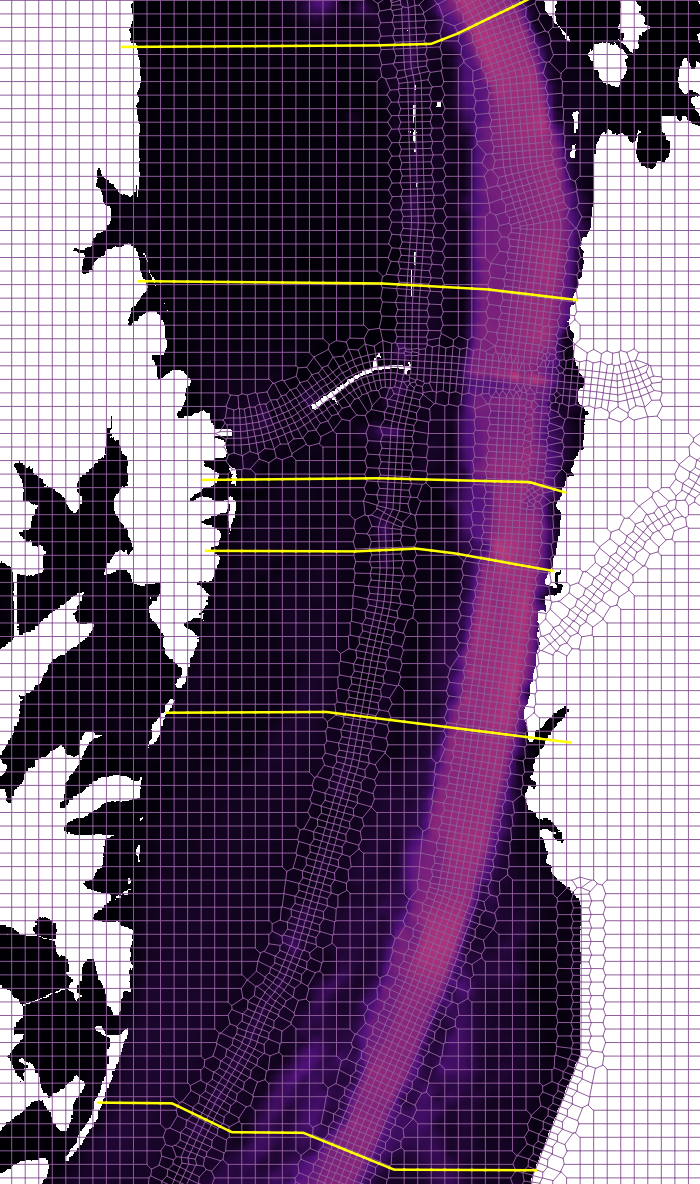



Then the widths of each Reference Line **"Segment"** were computed, and the centroid of each Segment found.

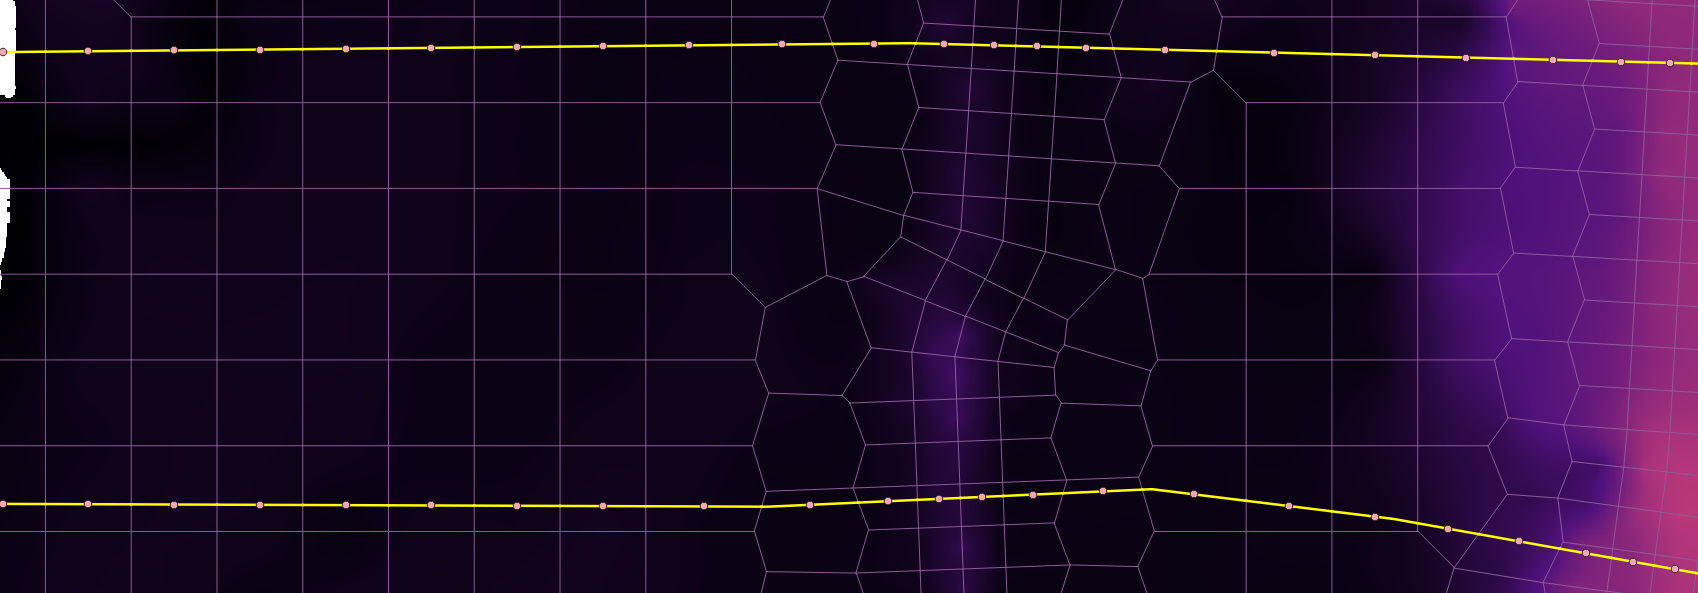



Using the RAS Stored raster maps for:
1. WSE Proposed Minus Existing
2. Depth
3. Velocity

The centroids were used to sample each of the three rasters and extract values. Now We can perform the No Rise computation.

$$\overline{\Delta}_{BFE} = \frac{\Delta_{S1} q_{S1} + \Delta_{S2} q_{S2} + \Delta_{S3} q_{S3}}{q_{S1} + q_{S2} + q_{S3}}$$

$\Delta{S}$ = Surcharge = Proposed - Existing 100yr WSE

q = Depth * Velocity

In [2]:
surcharge_raster = r"C:\Users\MBMcmanus\OneDrive - Garver\Documents\Work\ArkansasRiverWest\GIS\WSEL_Prop_minus_exist.tif"
depth_raster = r"C:\Users\MBMcmanus\OneDrive - Garver\Documents\Work\ArkansasRiverWest\RAS_ArkansasRiverWest\PR 100YR\Depth (Max).Proposed_Surface_1m.Proposed_Surface_1m.tif"
velocity_raster = r"C:\Users\MBMcmanus\OneDrive - Garver\Documents\Work\ArkansasRiverWest\RAS_ArkansasRiverWest\PR 100YR\Velocity (Max).Proposed_Surface_1m.Proposed_Surface_1m.tif"

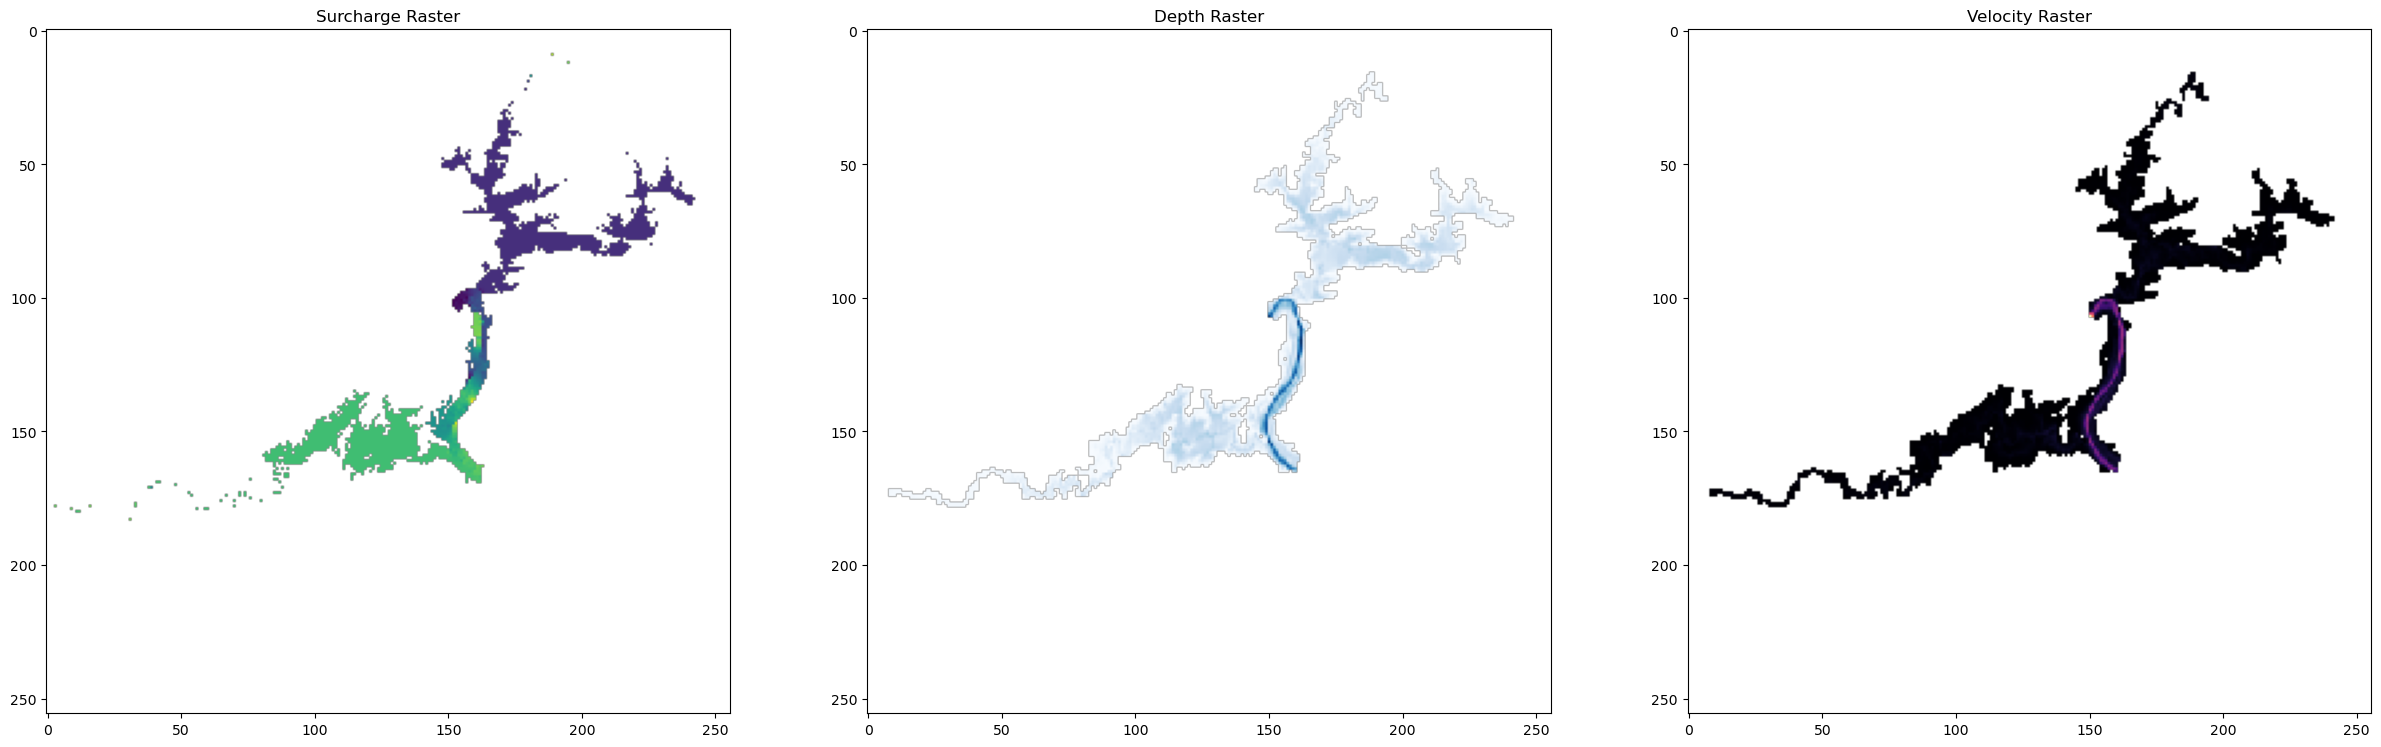

In [11]:
import rasterio
import matplotlib.pyplot as plt
# plot all the rasters

with rasterio.open(surcharge_raster) as s:
    with rasterio.open(depth_raster) as d:
        with rasterio.open(velocity_raster) as v:
            fig, ax = plt.subplots(1, 3, figsize=(30, 10))
            surcharge_data = s.read(1, out_shape=(256, 256))
            surcharge_data[surcharge_data == s.nodata] = None
            ax[0].imshow(surcharge_data, cmap='viridis')
            depth_data = d.read(1, out_shape=(256, 256))
            depth_data[depth_data == d.nodata] = None
            ax[1].imshow(depth_data, cmap='Blues')
            velocity_data = v.read(1, out_shape=(256, 256))
            velocity_data[velocity_data == v.nodata] = None
            ax[2].imshow(velocity_data, cmap='magma')
            ax[0].set_title('Surcharge Raster')
            ax[1].set_title('Depth Raster')
            ax[2].set_title('Velocity Raster')
            plt.show()

In [ ]:
# Preprocessed Feature Layer already contains the necessary fields to perform the calculation for the no rise calculation
